In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [43]:
flower = load_iris()

In [44]:
dir(flower)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [45]:
df = pd.DataFrame(flower.data, columns = flower.feature_names)
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [46]:
df.drop(['sepal width (cm)', 'sepal length (cm)'], axis = 1, inplace = True)

In [47]:
y = flower.target

Text(0, 0.5, 'petal width (cm)')

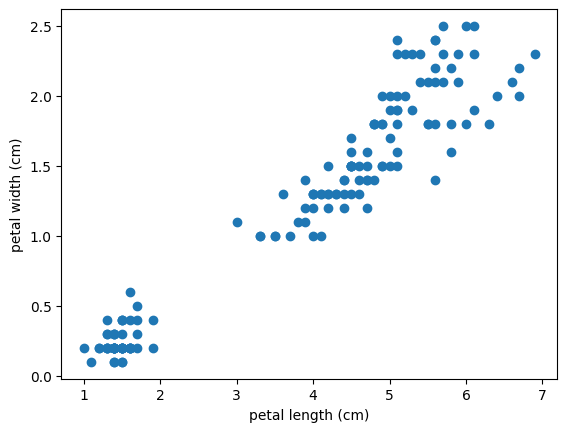

In [48]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [49]:
new_df = df.copy()

In [50]:
new_df['target'] = y

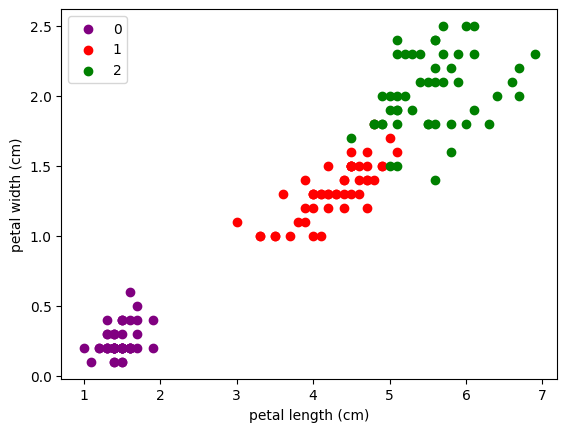

In [52]:
plt.scatter(new_df.loc[new_df['target'] == 0, 'petal length (cm)'], new_df.loc[new_df['target'] == 0, 'petal width (cm)'], color = 'purple', label = '0')
plt.scatter(new_df.loc[new_df['target'] == 1, 'petal length (cm)'], new_df.loc[new_df['target'] == 1, 'petal width (cm)'], color = 'red', label = '1')
plt.scatter(new_df.loc[new_df['target'] == 2, 'petal length (cm)'], new_df.loc[new_df['target'] ==2, 'petal width (cm)'], color = 'green', label = '2')
plt.legend()
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

In [53]:
scaler = MinMaxScaler()

In [54]:
scaler.fit(df[['petal length (cm)']])
new_df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])

In [56]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [57]:
new_df.head()

,petal length (cm),petal width (cm),target
0,0.067797,0.2,0
1,0.067797,0.2,0
2,0.050847,0.2,0
3,0.084746,0.2,0
4,0.067797,0.2,0


In [58]:
scaler.fit(df[['petal width (cm)']])
new_df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])

In [59]:
new_df.head()

,petal length (cm),petal width (cm),target
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


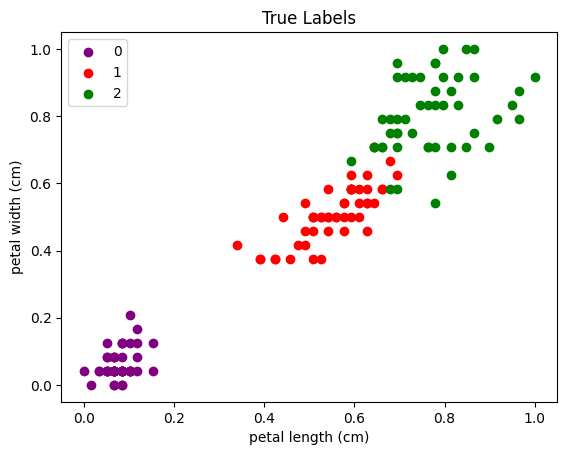

In [92]:
plt.scatter(new_df.loc[new_df['target'] == 0, 'petal length (cm)'], new_df.loc[new_df['target'] == 0, 'petal width (cm)'], color = 'purple', label = '0')
plt.scatter(new_df.loc[new_df['target'] == 1, 'petal length (cm)'], new_df.loc[new_df['target'] == 1, 'petal width (cm)'], color = 'red', label = '1')
plt.scatter(new_df.loc[new_df['target'] == 2, 'petal length (cm)'], new_df.loc[new_df['target'] ==2, 'petal width (cm)'], color = 'green', label = '2')
plt.legend()
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('True Labels')
plt.show()

In [64]:
krange = range(1, 12)
sse = []
for k in krange:
    model = KMeans(n_clusters = k)
    model.fit(new_df[['petal length (cm)', 'petal width (cm)']])
    sse.append(model.inertia_)

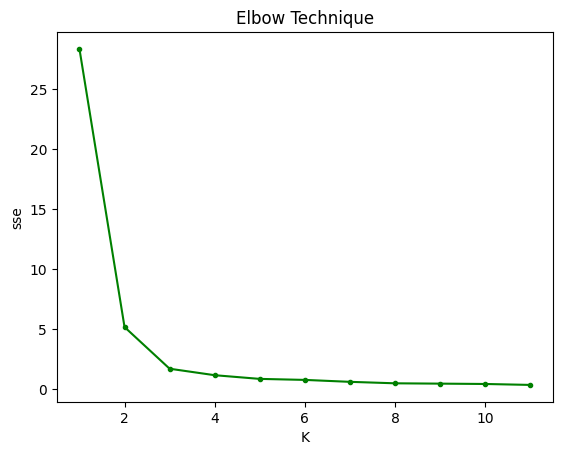

In [91]:
plt.plot(krange, sse, '.g-')
plt.xlabel('K')
plt.ylabel('sse')
plt.title('Elbow Technique')
plt.show()

In [72]:
model1 = KMeans(n_clusters = 3)

In [74]:
y_predicted = model1.fit_predict(new_df[['petal length (cm)', 'petal width (cm)']])

In [83]:
new_df['pred_target'] = y_predicted

In [81]:
center = model1.cluster_centers_

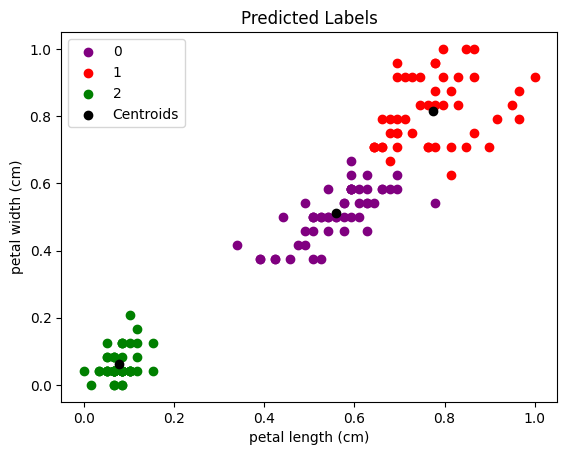

In [93]:
plt.scatter(new_df.loc[new_df['pred_target'] == 0, 'petal length (cm)'], new_df.loc[new_df['pred_target'] == 0, 'petal width (cm)'], color = 'purple', label = '0')
plt.scatter(new_df.loc[new_df['pred_target'] == 1, 'petal length (cm)'], new_df.loc[new_df['pred_target'] == 1, 'petal width (cm)'], color = 'red', label = '1')
plt.scatter(new_df.loc[new_df['pred_target'] == 2, 'petal length (cm)'], new_df.loc[new_df['pred_target'] == 2, 'petal width (cm)'], color = 'green', label = '2')
plt.scatter(center[:, 0], center[:,1], label = 'Centroids', color = 'black', marker = 'o')
plt.legend()
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Predicted Labels')
plt.show()